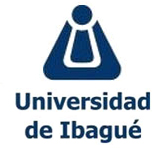

#**Análisis de base de datos de Covid-19 en Colombia**
####Análisis de datos en ingeniería
####Universidad de Ibagué - 2019
#### Facultad de ingeniería
####Bryan Fandiño, Jonatan Polanco

##**Tabla de contenido**
1. Introducción
2.Planteamiento del problema
  
  - Objetivos
3. Descripción de los datos
4. Trabajo Relacionado
5. Metodología
  - Analisis de junio (primer dia sin IVA 19 junio en Bogotá)

  - Analisis de julio (segundo dia sin iva 3 de julio en Bogotá)

  - Analisis general de dias sin IVA

  - Analisis dias festivos junio - julio

  - ¿De los casos activos cuantas personas se recuperaron, siguen contagiadas o fallecieron?

  - Analisis de contagios importados de covit 19 por departamento.

  - Tasa de positividad y fatalidad por departamentos y casos totales en Colombia.

6. Conclusiones y Trabajo futuro
7. Referencias



##**1. Introducción**

###¿Qué es el covid-19?

El covid-19 es una enfermedad infecciosa causada por el virus SARS-CoV-2. La OMS tuvo noticia por primera vez de la existencia de este nuevo virus el 31 de diciembre de 2019, al ser informada de un grupo de casos de «neumonía vírica» que se habían declarado en Wuhan (República Popular China).[1]

###¿Cuáles son los sintomas del covid?

Los síntomas más habituales de la COVID-19 son:

- Fiebre
- Tos seca
- Cansancio

Otros síntomas menos frecuentes y que pueden afectan a algunos pacientes:

- Pérdida del gusto o el olfato
- Congestión nasal
- Conjuntivitis (enrojecimiento ocular)
- Dolor de garganta
- Dolor de cabeza
- Dolores musculares o articulares  
- Diferentes tipos de erupciones cutáneas
- Náuseas o vómitos
- Diarrea
- Escalofríos o vértigo


Entre los síntomas de un cuadro grave de la COVID-19 se incluyen:

- Disnea (dificultad respiratoria)
- Pérdida de apetito
- Confusión
- Dolor u opresión persistente en el pecho
- Temperatura alta (por encima de los 38° C)


### ¿Qué ocurre a las personas que contraen el virus?

Entre las personas que desarrollan síntomas, la mayoría (alrededor del 80%) se recuperan de la enfermedad sin necesidad de recibir tratamiento hospitalario. Alrededor del 15% desarrollan una enfermedad grave y requieren oxígeno y el 5% llegan a un estado crítico y precisan cuidados intensivos. **[1]**

##¿Qué se sabe de las investigaciones del covid-19?

una de las investigaciones, publicada en la revista *Annals of Internal Medicine* **[2]**, está centrada en el periodo de incubación del Covid-19, o lo que es lo mismo, el tiempo que puede pasar entre el contagio y la aparición de los primeros síntomas del coronavirus.
Estas investigaciones dicen que el periodo medio de incubación del virus es de aproximadamente 4,5 a los 5,8 días. tambien se añade  que los síntomas pueden prolongarse dentro de los 12 días siguientes. Cabe decir que el estudio está basado en 181 casos confirmados de Covid-19. 

Por otro lado los datos más recientes, que avala el Ministerio de Sanidad español **[3]**, hablan de que los síntomas de fiebre, tos y falta de aliento "podrían aparecer en tan solo 2 días".



##**2.Planteamiento del problema**

 En colombia, durante la cuarentena hubo dias feriados, festivos o dias en que el gobierno otorga la famosa "reactivación de la economía". Estos días pueden ser objeto de reuniones o aglomeracion de personas. 
 
 Dos fechas importantes en las cuales este notebook se enfoca son:
 - Dias festivos
 - Dias sin iva
 
Se dice que el virus inició el 1 de diciembre del 2019, unos meses después, la enfermedad habría llevado al cierre de fronteras, al confinamiento de la población, contagiado a más de 4,3 millones de personas y matado a casi 300.000 alrededor del mundo. En ese lapso de tiempo los paises no habían cerrado sus fronteras, por lo cual a colombia seguían llegando extrangeros sin ningún problema, sin saber si portaban o no el virus.



###**Objetivos**
Las preguntas a las cuales se pretende dar solución con análisis de dátos son las siguientes:
* Analisis de contagios de covid 19 en los dias relevantes en los cuales puede haber aglomeración.

* Analisis de contagios importados de covid-19 en Colombia.

* ¿De los casos activos cuantas personas se recuperaron, siguen contagiadas o fallecieron?

* Tasa de positividad y fatalidad por departamentos y casos totales en Colombia.

##**3. Descripción de los datos**
Nuestra bases de datos:

   **Casos positivos de COVID-19 en Colombia**. **[4]**

Esta base de datos contiene información de personas que dieron positivo al virus. La información relevante con la cual se basa este notebook es:


- Fecha de inicio de síntomas 
- Nombre departamento
- Tipo de contagio
- Recuperado (Estado)


##**4. Trabajo Relacionado**
Devido a la pandemia de l covid-19, han surgido multiples investigaciones, analisis y proyectos de este virus; algunas universidades, empresas, gobiernos y personas interesadas estan contribuyendo al analisis del comportamiento de esta pandemia gracias a diversas bases de datos disponibles en la web.  

##**5. Metodología/Resultados**

Se importan las librerias necesarias, se carga la base de datos la cual trabajaremos y se imprimen los nombres de las columnas para saber que informacion tiene dicha base de datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import requests
import matplotlib.path as mpath

Base_datos_1 = pd.read_csv('Casos_positivos_de_COVID-19_en_Colombia.csv')
list(Base_datos_1)
Base_datos_1.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (14,22) have mixed types.Specify dtype option on import or set low_memory=False.



['fecha reporte web',
 'ID de caso',
 'Fecha de notificación',
 'Código DIVIPOLA departamento',
 'Nombre departamento',
 'Código DIVIPOLA municipio',
 'Nombre municipio',
 'Edad',
 'Unidad de medida de edad',
 'Sexo',
 'Tipo de contagio',
 'Ubicación del caso',
 'Estado',
 'Código ISO del país',
 'Nombre del país',
 'Recuperado',
 'Fecha de inicio de síntomas',
 'Fecha de muerte',
 'Fecha de diagnóstico',
 'Fecha de recuperación',
 'Tipo de recuperación',
 'Pertenencia étnica',
 'Nombre del grupo étnico']

Se filtran todos los departamentos de la base de datos y se hallan los casos positivos de cada departamento, luego se guardan en un dataframe y se visualiza.

In [ ]:
depCasosPos_df = pd.DataFrame({'Departamento': [], 'Total Casos Positivos': []},columns=['Departamento', 'Total Casos Positivos'])
t_departamentos = []
for k in Base_datos_1['Nombre departamento']:    # nombre de departamentos sin repetir de Base_datos_1 
  if k not in t_departamentos:
    t_departamentos.append(k)
for p in range(0,36):                     # Total casos positivos por departamento + Dataframe
  Dep_covid = Base_datos_1[Base_datos_1['Nombre departamento'] == t_departamentos[p] ]
  t_cas_pos = len(Dep_covid)
  #print(t_departamentos[p],'',t_cas_pos)
  depCasosPos_df.at[p+1,'Departamento']= t_departamentos[p]
  depCasosPos_df.at[p+1,'Total Casos Positivos']= t_cas_pos

print(depCasosPos_df)

       Departamento  Total Casos Positivos
1            BOGOTA               355714.0
2             VALLE               100009.0
3         ANTIOQUIA               199979.0
4         CARTAGENA                28619.0
5             HUILA                28375.0
6              META                26494.0
7         RISARALDA                21305.0
8   NORTE SANTANDER                25781.0
9            CALDAS                21846.0
10     CUNDINAMARCA                48763.0
11     BARRANQUILLA                43395.0
12        SANTANDER                49505.0
13          QUINDIO                15090.0
14           TOLIMA                26130.0
15            CAUCA                15017.0
16   STA MARTA D.E.                12636.0
17            CESAR                28476.0
18       SAN ANDRES                 2014.0
19         CASANARE                 6256.0
20           NARIÑO                24245.0
21        ATLANTICO                32134.0
22           BOYACA                19507.0
23         

En la tabla anterior, se puede ver que en Bogotá existen más casos positivos del covid. Con base a lo anterior, se escoge Bogotá para realizar el análisis respectivo.

### **Analisis de junio (primer dia sin IVA 19 junio en Bogotá)**

El primer dia sin iva de se realizó en los días de la cuarentena, este día corresponde al 19 de junio. Se procede a tomar sólo el mes de junio para realizar el análisis.


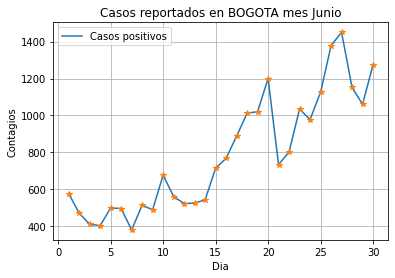

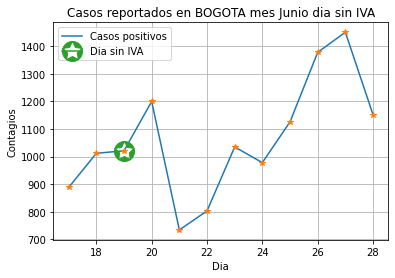

In [ ]:
nombre_departamento = 'BOGOTA'
dato_departamento = Base_datos_1.loc[(Base_datos_1)['Nombre departamento'] == nombre_departamento]

valor = 30
data=np.zeros((valor))
dias=np.zeros((valor))
for i in range(0,valor):
  a=str(i+1)
  data[i] = len(dato_departamento.loc[(dato_departamento)['Fecha de inicio de síntomas'] == a+'/6/2020 0:00:00'])
  dias[i] = a

eje_x_dia_junio = dias
eje_y_casos_junio = data

plt.figure()
plt.plot(eje_x_dia_junio,eje_y_casos_junio,label='Casos positivos')
plt.plot(eje_x_dia_junio,eje_y_casos_junio,'*')
plt.title('Casos reportados en '+ nombre_departamento +' mes Junio')
plt.xlabel("Dia")
plt.ylabel("Contagios")
plt.legend()
plt.grid()
plt.show()

eje_x_dia_junio_rang = dias[16:28]
eje_y_casos_junio_rang = data[16:28]
eje_x_dia_junio_19 = dias[18]
eje_y_casos_junio_19 = data[18]

star = mpath.Path.unit_regular_star(5)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

plt.figure()
plt.plot(eje_x_dia_junio_rang,eje_y_casos_junio_rang,label='Casos positivos')
plt.plot(eje_x_dia_junio_rang,eje_y_casos_junio_rang,'*')
plt.plot(eje_x_dia_junio_19,eje_y_casos_junio_19, marker=cut_star, markersize=20,label='Dia sin IVA')
plt.title('Casos reportados en '+ nombre_departamento +' mes Junio dia sin IVA')
plt.xlabel("Dia")
plt.ylabel("Contagios")
plt.legend()
plt.grid()
plt.show()

8 días despues del primer día sin iva, se evidencia un pico en el numero de personas con sintomas del Covid-19 en Bogotá.

### **Analisis de julio (segundo dia sin iva 3 de julio en Bogotá)**

El segundo dia sin iva de se realizó en los días de la cuarentena, este día corresponde al 3 de julio. Se procede a tomar sólo el mes de julio para realizar el análisis.


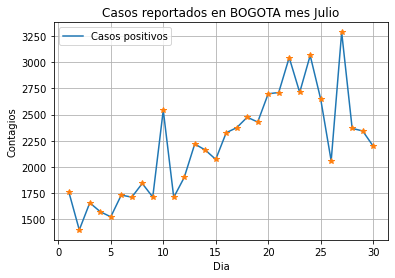

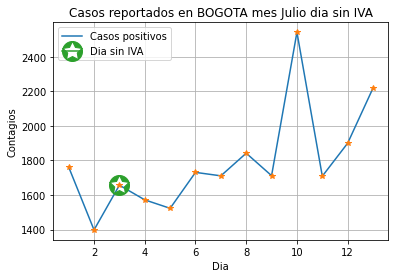

In [ ]:
nombre_departamento = 'BOGOTA'
dato_departamento = Base_datos_1.loc[(Base_datos_1)['Nombre departamento'] == nombre_departamento]

valor = 30
data=np.zeros((valor))
dias=np.zeros((valor))
for i in range(0,valor):
  a=str(i+1)
  data[i] = len(dato_departamento.loc[(dato_departamento)['Fecha de inicio de síntomas'] == a+'/7/2020 0:00:00'])
  dias[i] = a

eje_x_dia_julio = dias
eje_y_casos_julio = data

plt.figure()
plt.plot(eje_x_dia_julio,eje_y_casos_julio,label='Casos positivos')
plt.plot(eje_x_dia_julio,eje_y_casos_julio,'*')
plt.title('Casos reportados en '+ nombre_departamento +' mes Julio')
plt.xlabel("Dia")
plt.ylabel("Contagios")
plt.legend()
plt.grid()
plt.show()

eje_x_dia_julio_rang = dias[0:13]
eje_y_casos_julio_rang = data[0:13]
eje_x_dia_julio_3 = dias[2]
eje_y_casos_julio_3 = data[2]

star = mpath.Path.unit_regular_star(5)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

plt.figure()
plt.plot(eje_x_dia_julio_rang,eje_y_casos_julio_rang,label='Casos positivos')
plt.plot(eje_x_dia_julio_rang,eje_y_casos_julio_rang,'*')
plt.plot(eje_x_dia_julio_3,eje_y_casos_julio_3, marker=cut_star, markersize=20,label='Dia sin IVA')
plt.title('Casos reportados en '+ nombre_departamento +' mes Julio dia sin IVA')
plt.xlabel("Dia")
plt.ylabel("Contagios")
plt.legend()
plt.grid()
plt.show()

7 días despues del segundo día sin iva se evidencia un pico en el número de personas con síntomas del covid-19 en Bogotá.

### **Analisis general de dias sin IVA**

Este es el análisis de los resultados de los días sin iva con las personas que tienen sintomas del Covid-19, buscando una relación entre estos dos datos.

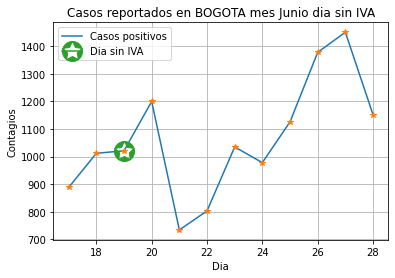

Contagios dia sin IVA (19 de junio): 1021.0
Contagios pico luego del dia sin IVA (25 de junio): 1451.0
Contagios promedio que aumentaron luego del dia sin IVA de junio: 430.0



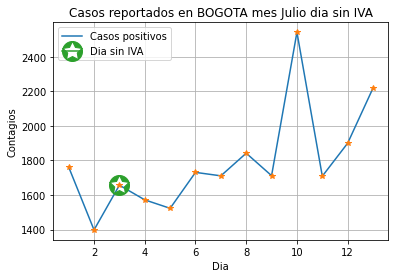

Contagios dia sin IVA (3 de julio): 1657.0
Contagios pico luego del dia sin IVA (10 de julio): 2542.0
Contagios promedio que aumentaron luego del dia sin IVA de julio: 885.0



In [ ]:
plt.figure()
plt.plot(eje_x_dia_junio_rang,eje_y_casos_junio_rang,label='Casos positivos')
plt.plot(eje_x_dia_junio_rang,eje_y_casos_junio_rang,'*')
plt.plot(eje_x_dia_junio_19,eje_y_casos_junio_19, marker=cut_star, markersize=20,label='Dia sin IVA')
plt.title('Casos reportados en '+ nombre_departamento +' mes Junio dia sin IVA')
plt.xlabel("Dia")
plt.ylabel("Contagios")
plt.legend()
plt.grid()
plt.show()

casos_dia19_junio = str(eje_y_casos_junio[18])
casos_pico_junio = str(eje_y_casos_junio[26])
casos_aumento_junio_por_iva = str(eje_y_casos_junio[26] - eje_y_casos_junio[18])
print('Contagios dia sin IVA (19 de junio): '+ casos_dia19_junio)
print('Contagios pico luego del dia sin IVA (25 de junio): '+ casos_pico_junio )
print('Contagios promedio que aumentaron luego del dia sin IVA de junio: '+ casos_aumento_junio_por_iva + '\n')

plt.figure()
plt.plot(eje_x_dia_julio_rang,eje_y_casos_julio_rang,label='Casos positivos')
plt.plot(eje_x_dia_julio_rang,eje_y_casos_julio_rang,'*')
plt.plot(eje_x_dia_julio_3,eje_y_casos_julio_3, marker=cut_star, markersize=20,label='Dia sin IVA')
plt.title('Casos reportados en '+ nombre_departamento +' mes Julio dia sin IVA')
plt.xlabel("Dia")
plt.ylabel("Contagios")
plt.legend()
plt.grid()
plt.show()

casos_dia3_julio = str(eje_y_casos_julio[2])
casos_pico_julio = str(eje_y_casos_julio[9])
casos_aumento_julio_por_iva = str(eje_y_casos_julio[9] - eje_y_casos_julio[2])
print('Contagios dia sin IVA (3 de julio): '+ casos_dia3_julio)
print('Contagios pico luego del dia sin IVA (10 de julio): '+ casos_pico_julio )
print('Contagios promedio que aumentaron luego del dia sin IVA de julio: '+ casos_aumento_julio_por_iva + '\n')


### **Analisis dias festivos junio - julio**

En el mes de junio (en cuarentena) hubo 3 festivos de seguido, escogemos este més de junio y julio para realizar el análisis en estos meses con respecto a los sintomas de covid en Bogotá.

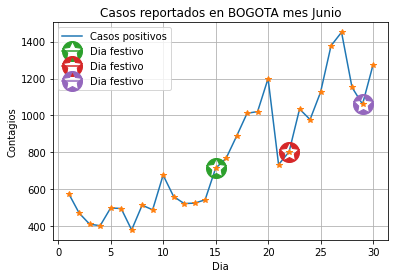

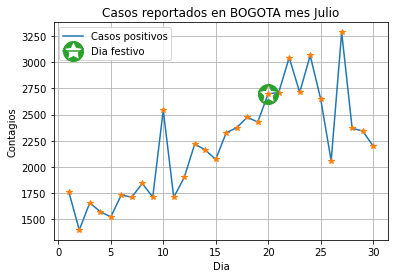

Contagios dia 15 (Festivo): 714.0
Contagios pico despues del festivo 15:  1200.0
Contagios promedio que aumentaron luego del primer festivo de junio: 486.0



Contagios dia 22 (Festivo): 803.0
Contagios pico despues del festivo 15:  1451.0
Contagios promedio que aumentaron luego del segundo festivo de junio: 648.0



Contagios dia 29 (Festivo): 1061.0


In [ ]:
eje_x_dia_juniof = eje_x_dia_junio[14] 
eje_y_casos_juniof = eje_y_casos_junio[14]
eje_x_dia_juniof21 = eje_x_dia_junio[21] 
eje_y_casos_juniof21 = eje_y_casos_junio[21]
eje_x_dia_juniof28 = eje_x_dia_junio[28] 
eje_y_casos_juniof28 = eje_y_casos_junio[28]

plt.figure()
plt.plot(eje_x_dia_junio,eje_y_casos_junio,label='Casos positivos')
plt.plot(eje_x_dia_junio,eje_y_casos_junio,'*')
plt.plot(eje_x_dia_juniof,eje_y_casos_juniof, marker=cut_star, markersize=20,label='Dia festivo')
plt.plot(eje_x_dia_juniof21,eje_y_casos_juniof21, marker=cut_star, markersize=20,label='Dia festivo')
plt.plot(eje_x_dia_juniof28,eje_y_casos_juniof28, marker=cut_star, markersize=20,label='Dia festivo')
plt.title('Casos reportados en '+ nombre_departamento +' mes Junio')
plt.xlabel("Dia")
plt.ylabel("Contagios")
plt.legend()
plt.grid()
plt.show()

eje_x_dia_julio_3f = dias[19]
eje_y_casos_julio_3f = data[19]

plt.figure()
plt.plot(eje_x_dia_julio,eje_y_casos_julio,label='Casos positivos')
plt.plot(eje_x_dia_julio,eje_y_casos_julio,'*')
plt.plot(eje_x_dia_julio_3f,eje_y_casos_julio_3f, marker=cut_star, markersize=20,label='Dia festivo')
plt.title('Casos reportados en '+ nombre_departamento +' mes Julio')
plt.xlabel("Dia")
plt.ylabel("Contagios")
plt.legend()
plt.grid()
plt.show()

casos_15_junio = str(eje_y_casos_junio[14])
pico_20_junio =  str(eje_y_casos_junio[19])
casos_22_junio = str(eje_y_casos_junio[21])
pico_27_junio =  str(eje_y_casos_junio[26])
casos_29_junio = str(eje_y_casos_junio[28])
casos_aumento_junio1 = str(eje_y_casos_junio[19] - eje_y_casos_junio[14])
casos_aumento_junio2 = str(eje_y_casos_junio[26] - eje_y_casos_junio[21])
print('Contagios dia 15 (Festivo): '+ casos_15_junio)
print('Contagios pico despues del festivo 15:  ' + pico_20_junio)
print('Contagios promedio que aumentaron luego del primer festivo de junio: '+ casos_aumento_junio1 + '\n')

print('')
print('')

print('Contagios dia 22 (Festivo): '+ casos_22_junio)
print('Contagios pico despues del festivo 15:  ' + pico_27_junio)
print('Contagios promedio que aumentaron luego del segundo festivo de junio: '+ casos_aumento_junio2 + '\n')

print('')
print('')

print('Contagios dia 29 (Festivo): '+ casos_29_junio)

En el mes de junio, 5 días despues de los días festivos hubo un pico de personas con síntomas del covid.

En el mes de julio sólo hubo un festivo, pero se evidencian múltiples picos después de este día.

### **¿De los casos activos cuantas personas se recuperaron, siguen contagiadas o fallecieron?**

Análisis de personas recuperadas, activas y fallecidas en toda Colombia.

In [ ]:
CasosARF_df = pd.DataFrame({'Estado': [], 'Poblacion': []},columns=['Estado', 'Poblacion'])
t_casos = []
for k in Base_datos_1['Recuperado']:    # nombre de casos sin repetir de Base_datos_1 
  if k not in t_casos:
    t_casos.append(k)
for p in range(0,5):                     # Total casos + Dataframe
  N_casos = Base_datos_1[Base_datos_1['Recuperado'] == t_casos[p] ]
  t_cas_po = len(N_casos)
  #print(t_casos[p],'',t_cas_pos)
  CasosARF_df.at[p+1,'Estado']= t_casos[p]
  CasosARF_df.at[p+1,'Poblacion']= t_cas_po

data_Fallecidos = CasosARF_df.iloc[1,1]+CasosARF_df.iloc[3,1]
CasosARF_df2 = CasosARF_df.replace({CasosARF_df.iloc[1,1]: data_Fallecidos})
CasosARF_df2 = CasosARF_df2.drop([3,4],axis=0).reset_index(drop=True)
%load_ext google.colab.data_table
CasosARF_df2

,Estado,Poblacion
0,Recuperado,1138581.0
1,Fallecido,34929.0
2,Activo,57132.0


En colombia hubo un total de 1138581 recuperados, que corresponte a un 92.5% de las personas que dieron positivo. Lo que significa que un 92.5% de la población con covid se recupera. 
Este porcentaje es superior al 80% que la OMS nos dice. [1]

Un 2.83% de las personas con positivo fallecen, y un 4.64% continuan con el covid.

### **Analisis de contagios importados de covit 19 por departamento.**

Se quiere conocer que paises fueron los mayores influenciadores del Covid-19 en Colombia. y el porcentaje de personas que importaron el virus a Colombia.

In [ ]:
Base_datos_1_1 = Base_datos_1.replace(['ESTADOS UNIDOS DE AMÉRICA','ESTADOS UNIDOS DE AMERICA'], 'ESTADOS UNIDOS')
Base_datos_1_1 = Base_datos_1_1.replace(['PANAMÁ'], 'PANAMA')
Base_datos_1_1 = Base_datos_1_1.replace(['MEXICO'], 'MÉXICO')
Base_datos_1_1 = Base_datos_1_1.replace(['REINO UNIDO'], 'REINO UNIDO DE GRAN BRETAÑA E IRLANDA DEL NORTE')
Base_datos_1_1 = Base_datos_1_1.replace(['REPUBLICA DOCIMINCANA'], 'REPÚBLICA DOMINICANA')
Base_datos_1_1 = Base_datos_1_1.replace(['PERÚ'], 'PERU')
Base_datos_1_1 = Base_datos_1_1.replace(['ARABIA SAUDÍ'], 'ARABIA SAUDITA')

Casos_import = pd.DataFrame({'País': [], 'Total Casos importados': []},columns=['País', 'Total Casos importados'])
t_Casos_import = []
for k in Base_datos_1_1['Nombre del país'].dropna():    # nombre de departamentos sin repetir de Base_datos_1 
  if k not in t_Casos_import:
    t_Casos_import.append(k)
for p in range(0,43):                     # Total casos positivos por departamento + Dataframe
  Casos_import_dep = Base_datos_1_1[Base_datos_1_1['Nombre del país'] == t_Casos_import[p] ]
  t_cas_pos_inport = len(Casos_import_dep)
  #print(t_Casos_import[p],'',t_cas_pos_inport)
  Casos_import.at[p+1,'País']= t_Casos_import[p]
  Casos_import.at[p+1,'Total Casos importados']= t_cas_pos_inport
%load_ext google.colab.data_table
Casos_import

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,País,Total Casos importados
1,ITALIA,11.0
2,ESPAÑA,258.0
3,ESTADOS UNIDOS,219.0
4,ECUADOR,66.0
5,FRANCIA,19.0
6,TURQUÍA,27.0
7,ALEMANIA,11.0
8,BRASIL,51.0
9,CROACIA,1.0
10,PANAMA,36.0


La tabla anterior presenta el numero de personas extranjeras que al haber llegado a colombia dieron positivo al virus.

881 extranjeros en total importaron el virus a Colombia.
Un 0.07% de los positivos con covid en Colombia.

Los paises más influenciadores del Covid en Colombia fueron España y Estados Unidos.

### **Tasa de positividad y fatalidad por departamentos y casos totales en Colombia.**

La tasa de positividad se halla dividiendo el total de positivos en Colombia entre el total de positivos en cáda departamento.


La tasa de fatalidad se halla dividiendo el total de fallecidos en Colombia por el codid entre el total de fallecidos en cáda departamento.


In [ ]:
Base_datos_1_2 = Base_datos_1.replace(['fallecido'], 'Fallecido')

depCasosPos2_df = pd.DataFrame({'Departamento': [], 'Total Casos Positivos': [], 'Tasa de Positividad': [], 'Tasa de Fatalidad': []},columns=['Departamento', 'Total Casos Positivos', 'Tasa de Positividad', 'Tasa de Fatalidad'])
t_departamentos2 = []

for k in Base_datos_1['Nombre departamento']:    # nombre de departamentos sin repetir de Base_datos_1 
  if k not in t_departamentos2:
    t_departamentos2.append(k)

for p in range(0,36):                     # Total casos positivos por departamento + Dataframe
  Dep_covid2 = Base_datos_1[Base_datos_1['Nombre departamento'] == t_departamentos2[p] ]
  t_cas_pos2 = len(Dep_covid2)
  t_positividad = t_cas_pos2/len(Base_datos_1)

  N_casos_fallecidos_dep = Dep_covid2[Dep_covid2['Recuperado'] == 'Fallecido' ]
  t_cas_fallecido_dep = len(N_casos_fallecidos_dep)
  N_casos_fallecidos = Base_datos_1[Base_datos_1['Recuperado'] == 'Fallecido' ]
  T_casos_fallecidos = len(N_casos_fallecidos)
  t_fatalidad = t_cas_fallecido_dep/ T_casos_fallecidos
 
  depCasosPos2_df.at[p+1,'Departamento']= t_departamentos2[p]
  depCasosPos2_df.at[p+1,'Total Casos Positivos']= t_cas_pos2
  depCasosPos2_df.at[p+1,'Tasa de Positividad']= t_positividad
  depCasosPos2_df.at[p+1,'Tasa de Fatalidad']= t_fatalidad
%load_ext google.colab.data_table
depCasosPos2_df

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,Departamento,Total Casos Positivos,Tasa de Positividad,Tasa de Fatalidad
1,BOGOTA,355714.0,0.288391,0.234256
2,VALLE,100009.0,0.081081,0.092831
3,ANTIOQUIA,199979.0,0.162131,0.108423
4,CARTAGENA,28619.0,0.023203,0.017729
5,HUILA,28375.0,0.023005,0.025236
6,META,26494.0,0.021480,0.017353
7,RISARALDA,21305.0,0.017273,0.014610
8,NORTE SANTANDER,25781.0,0.020902,0.036006
9,CALDAS,21846.0,0.017711,0.011810
10,CUNDINAMARCA,48763.0,0.039534,0.038865


##**6.Conclusiones y Trabajo futuro**


Del análisis anterior se concluye:

- Python es un lenguaje óptimo y versatil para éste tipo de análisis, ya que con sus librerías como pandas y numpy permiten la facilidad del análisis de los dátos sin grandes problemas en el código. No sucedería lo mismo con otros lenguajes de programación como lo son Java y C.

- El correcto análisis de las bases de datos a trabajar permite conocer sus errores (ya sea numérico o de texto) y sus falencias. Estos conocimientos permite a quienes analizan estos datos poder corregir los errores y poder realizar un análisis óptimo.


- Como anteriormente se comentó, se han realizado investigaciones respecto al tiempo de encubación del virus, pero no se puede predecir (hay un rango). En el análisis anterior se puede ver claramente que despues de las fechas marcadas existe un pico entre el rango descrito en la introducción (2 días a 12 días de inicio de sintomas), pero no hay una presición en el comportamiento/inicio de los sintomas de los contagiados.

- Al analizar, se decide escoger de la base de datos las fechas de inicio de los síntomas de las personas que dieron positivo al virus; esto con el fin de estar más cerca al dia de contagio, y así ser más acertados (ya que se conoce el rango de inicio de sintomas).


Trabajo futuro:

Este proyecto puede ser de ayuda para un anális más profundo del covid-19 por departamentos en Colombia y/o paises que importaron el virus en Colombia.

Tambien puede ser de gran ayuda para visualizar la extensa base de datos de casos positivos de Covid-19 en colombia y así conocer su información.

##**7.Referencias**
* Base de datos: https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data




[1] https://www.who.int/es/news-room/q-a-detail/coronavirus-disease-covid-19

[2] https://www.acpjournals.org/doi/10.7326/M20-0504

[3] https://www.mscbs.gob.es/en/profesionales/saludPublica/ccayes/alertasActual/nCov/ciudadania.htm
